<a href="https://colab.research.google.com/github/venkatesh-eranti/personal_projects/blob/main/Simple%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

Building a simple linear regression model using **adverstising dataset**

## Reading and understanding the data

### importing the necessary librariers

In [28]:
# to read and understand the data
import pandas as pd
import numpy as np
# to visualise the data
import matplotlib.pyplot as plt
import seaborn as sns
# to split the data
from sklearn.model_selection import train_test_split
# to model the data
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
#evaluating the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
%matplotlib inline

### reading the data

In [5]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### understanding the structure of data

In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


shows all are with same data type

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


seems there are no missing values

## Cleaning the data



1.   Identify the data types $\rightarrow$ seems all values are having same data type of float
2.   Imputing/ removing missing values $\rightarrow$ seems there are no missing values
3.   Handling Outliers $\rightarrow$ need to check now
4.   Standardising the data $\rightarrow$ as all the data is in numerical values there is no need to standardise the data

### checking for outliers in the data

In [10]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
90%,261.440000,43.520000,59.070000,21.710000
95%,280.735000,46.810000,71.825000,23.800000
99%,292.907000,49.400000,89.515000,25.507000


seems there is some outlier in newspaper columns.<br>
lets check the same by plotting box plot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


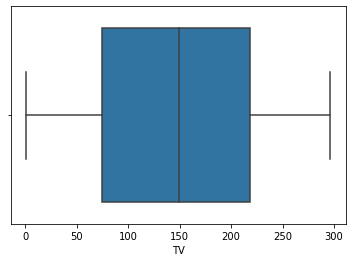

In [36]:
sns.boxplot(df['TV']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


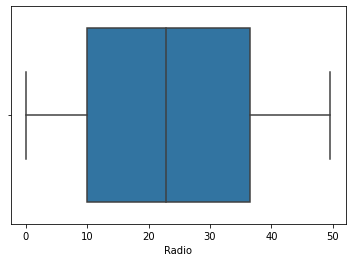

In [37]:
sns.boxplot(df['Radio'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


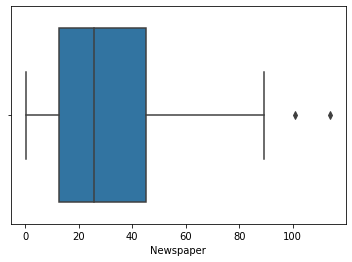

In [38]:
sns.boxplot(df['Newspaper'])

visibly those 2 values are outliers. but let's check how far those are away from Normal standard deviation

In [41]:
df[df['Newspaper']>90]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [44]:
mean=np.mean(df['Newspaper'])
std=np.std(df['Newspaper'])
# check for 1 standard deviation
mean+(3*std)

95.72631817267208

clearly the above two values are more than 3 standard deviations away.<br>
so we can consider those as outliers and imput the mean values instead of those

In [52]:
df['Newspaper'][df['Newspaper']>90]=mean

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


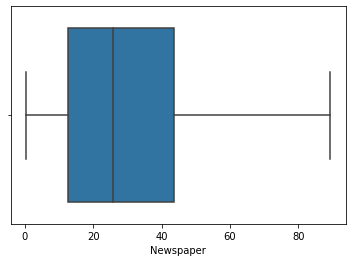

In [53]:
sns.boxplot(df['Newspaper'])

## Exploratort Data Analysis

### checking the relations of each features with respect to **sales**

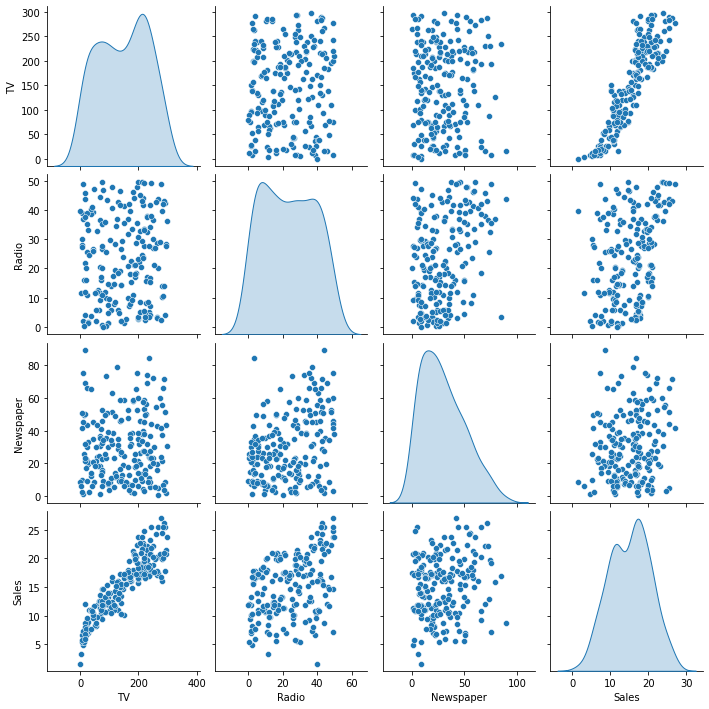

In [56]:
sns.pairplot(df,diag_kind='kde');

### observations

from above pairplot i can see only TV is following Linear distrubution and radio and Newspaer data are randomly scattered

As i can see bimodal distribution for both dependent (sales) and independent variables (tv and radio). <br>
my hunch is residuals will be skewed
seems data came from 2 different sources or typo's <br>
[how to deal with Bimodal distrubution](https://www.researchgate.net/post/How_can_we_deal_with_bimodal_variables) we should use maximum likelihood by the (Expectation-Maximization) EM algorithm

due to this bimodal distribution of data we will get mean at different locations

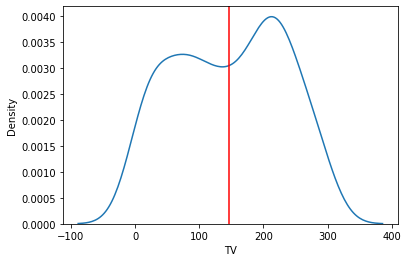

In [65]:
sns.kdeplot(df['TV'])
plt.axvline(df['TV'].mean(),color='red')

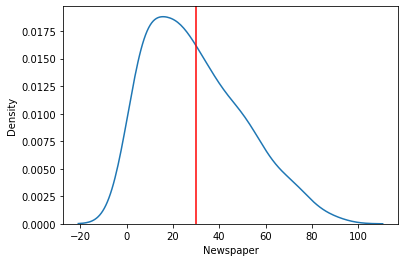

In [66]:
sns.kdeplot(df['Newspaper'])
plt.axvline(df['Newspaper'].mean(),color='red')

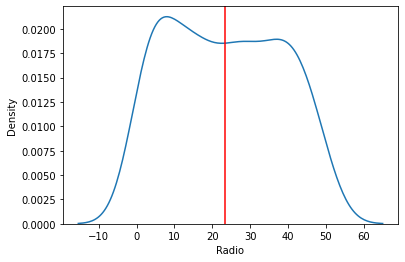

In [67]:
sns.kdeplot(df['Radio'])
plt.axvline(df['Radio'].mean(),color='red')

### checking the correlation of features by using Heatmap

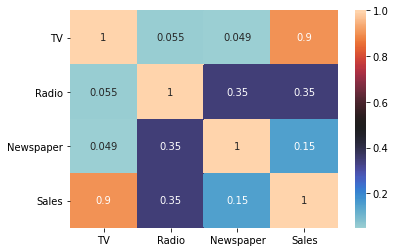

In [71]:
sns.heatmap(df.corr(),annot=True,center=0.5)

## splitting the model in to Train and test data

In [74]:
x=df.drop('Sales',axis=1)
y=df['Sales']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [117]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

## building a Simple Linear Regression model

### by using statsmodels

#### statsmodels for TV

In [167]:
x_train_sm=sm.add_constant(x_train['TV'])

In [168]:
lin_tv=sm.OLS(y_train,x_train_sm).fit()
lin_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     622.8
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           1.09e-56
Time:                        11:14:11   Log-Likelihood:                -362.99
No. Observations:                 160   AIC:                             730.0
Df Residuals:                     158   BIC:                             736.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0281      0.378     18.588      0.000       6.281       7.775
TV             0.0554      0.002     24.955      0.000       0.051       0.060
==============================================================================
Omnibus:                        0.509   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.775   Jarque-Bera (JB):                0.516
Skew:                          -0.133   Prob(JB):                        0.773
Kurtosis:                       2.918   Cond. No.                         346.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### interpretting TV variable

1) $R^2$=0.798 means model explains 79 % of variation in the data <br>
2) Prob(F-statistic) < 0.05 means fit is not by chance & overall model is significant
3) P-value < 0.05 means TV coefficient is significant

if a company is not having any advertisements in TV also we predict the sales will be 7.02 and for each additional TV advertisment we predict the sales of tv will raise by 0.05 units

#### stasmodels for Radio

In [83]:
x=x_train['Radio']
y=y_train
sm.OLS(y,sm.add_constant(x)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     17.25
Date:                Tue, 10 Nov 2020   Prob (F-statistic):           5.35e-05
Time:                        10:09:42   Log-Likelihood:                -482.51
No. Observations:                 160   AIC:                             969.0
Df Residuals:                     158   BIC:                             975.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6115      0.745     16.923      0.000      11.140      14.083
Radio          0.1110      0.027      4.153      0.000       0.058       0.164
==============================================================================
Omnibus:                        7.114   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.560
Skew:                          -0.431   Prob(JB):                       0.0376
Kurtosis:                       2.511   Cond. No.                         52.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### statsmodels for Newspaper

In [114]:
x=x_train['Newspaper']
y=y_train
sm.OLS(y,sm.add_constant(x)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     6.124
Date:                Tue, 10 Nov 2020   Prob (F-statistic):             0.0144
Time:                        10:29:25   Log-Likelihood:                -487.76
No. Observations:                 160   AIC:                             979.5
Df Residuals:                     158   BIC:                             985.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7369      0.731     18.788      0.000      12.293      15.181
Newspaper      0.0491      0.020      2.475      0.014       0.010       0.088
==============================================================================
Omnibus:                        5.735   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                3.248
Skew:                          -0.119   Prob(JB):                        0.197
Kurtosis:                       2.344   Cond. No.                         66.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### observations:
we can see only TV is significantly predicting the sales

### Residual Analysis

In [120]:
y_train_pred=lin_tv.predict(x_train_sm)

In [121]:
residual_error=y_train-y_train_pred

### checking the assumptions


1.   residual errors are normally distributed
2.   errors are independent to each other



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


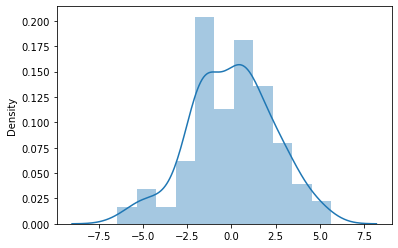

In [122]:
sns.distplot(residual_error);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


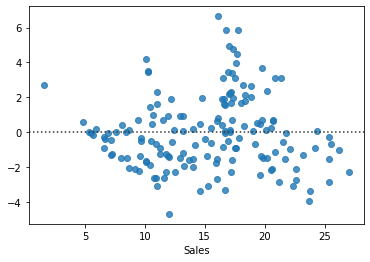

In [125]:
sns.residplot(y_train,y_train_pred)

## Evaluation on Test Dataset

In [127]:
x_test_sm=sm.add_constant(x_test['TV'])
y_test_pred=lin_tv.predict(x_test_sm)

In [128]:
r2_score(y_test,y_test_pred)

0.861922219696262

In [126]:
r2_score(y_train,y_train_pred)

0.7976310037001155

overall, model fit seems to be doing a good job

In [134]:
mean_absolute_error(y_test,y_test_pred)

1.637338176006449

In [135]:
mean_squared_error(y_test,y_test_pred)

4.213274320687691

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


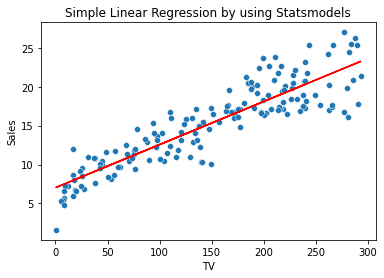

In [170]:
sns.scatterplot(x_train['TV'],y_train)
plt.plot(x_train['TV'],y_train_pred,color='r')
plt.title('Simple Linear Regression by using Statsmodels')
plt.show()

### by using Sklearn (scikit learn)

In [144]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [145]:
linear_reg_sk=LinearRegression()

In [153]:
linear_reg_sk.fit(x_train['TV'].values.reshape(-1,1),y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [156]:
linear_reg_sk.predict(x_test['TV'].values.reshape(-1,1))

array([22.18396193,  8.61181997, 10.7326402 , 13.27983942, 20.32339902,
       16.08175857,  8.51214696, 11.18670615, 23.28590247, 11.46911302,
       12.03392676,  9.21539544, 14.94105631, 19.34328106, 20.78300236,
       13.72836798,  8.06915579, 12.32740841, 18.091831  , 10.81570104,
       19.03318724, 20.9214371 ,  8.11345491, 22.77092523, 11.85673029,
        7.75352458, 14.74171028, 11.16455659, 23.44094938, 19.43187929,
        7.75906197, 18.69540647, 17.26675995, 19.22699588, 10.86000016,
       10.68834108, 19.73643572,  7.25515951, 18.48498567, 21.17061963])

In [158]:
linear_reg_sk.intercept_

7.028126539286799

In [157]:
linear_reg_sk.coef_

array([0.0553739])

Intercept & coefficient values are exactly matching with statsmodels for TV

In [160]:
y_train_pred_sk=linear_reg_sk.predict(x_train['TV'].values.reshape(-1,1))
y_test_pred_sk=linear_reg_sk.predict(x_test['TV'].values.reshape(-1,1))

In [161]:
r2_score(y_train,y_train_pred_sk)

0.7976310037001155

In [162]:
r2_score(y_test,y_test_pred_sk)

0.8619222196962619

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


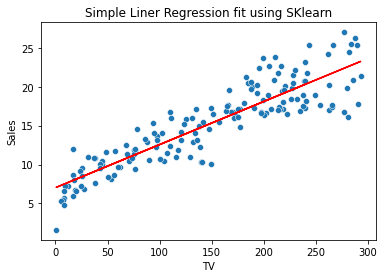

In [165]:
sns.scatterplot(x_train['TV'],y_train)
plt.plot(x_train['TV'],y_train_pred_sk,color='r')
plt.title('Simple Liner Regression fit using SKlearn')
plt.show()